# Import Data and Create the DF

### Read the csv directly if df created already (Can skip this section after the first time)

In [1]:
import os
import pandas as pd

# Base path replace ... with your base path
base_path = r'..\NLP4LSS Project'

# Specify the target file or directory
target_path = os.path.join(base_path, 'NLP4LSS Data\hein-daily')

# Matching string patterns
speeches_files_pattern = 'speeches'
speakermap_files_pattern = 'SpeakerMap'

# Get the names of files matching the string pattern
speeches = [
    file for file in os.listdir(target_path) if speeches_files_pattern in file
]

speakermaps = [
    file for file in os.listdir(target_path) if speakermap_files_pattern in file
]

In [2]:
# Read and concatenate the speeches files
speeches_data_frames = []
for file_name in speeches:
    file_path = os.path.join(target_path, file_name)
    try:
        df = pd.read_csv(file_path, delimiter='|', error_bad_lines=False, encoding='latin-1')
        speeches_data_frames.append(df)
    except pd.errors.ParserError:
        print(f"Skipped file '{file_name}' due to parsing error.")

speeches_concatenated = pd.concat(speeches_data_frames)

C:\Users\sakar\AppData\Local\Temp\ipykernel_7340\3305853485.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, delimiter='|', error_bad_lines=False, encoding='latin-1')
Skipping line 4272: expected 2 fields, saw 3
Skipping line 20062: expected 2 fields, saw 3
Skipping line 42382: expected 2 fields, saw 3
Skipping line 128329: expected 2 fields, saw 3
Skipping line 184070: expected 2 fields, saw 3
Skipping line 198827: expected 2 fields, saw 3

C:\Users\sakar\AppData\Local\Temp\ipykernel_7340\3305853485.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, delimiter='|', error_bad_lines=False, encoding='latin-1')
Skipping line 38596: expected 2 fields, saw 3
Skipping line 121592: expected 2 fields, saw 44
Skipping line 149974: expected 2 fields, 

In [3]:
# Read and concatenate the speakermap files
speakermaps_data_frames = []
for file_name in speakermaps:
    file_path = os.path.join(target_path, file_name)
    try:
        if file_name.endswith('.txt'):
            df = pd.read_csv(file_path, delimiter='|', encoding='utf-8')
        elif file_name.endswith('.csv'):
            df = pd.read_csv(file_path, encoding='utf-8')
        speakermaps_data_frames.append(df)
    except pd.errors.ParserError:
        print(f"Skipped file '{file_name}' due to parsing error.")

speakermaps_concatenated = pd.concat(speakermaps_data_frames)

In [4]:
sorted_speakermaps_concatenated = speakermaps_concatenated.sort_values(by='speakerid', ascending=False)

In [5]:
# Merge the DataFrames based on the 'speech_id' column
merged_df = sorted_speakermaps_concatenated.merge(speeches_concatenated, on='speech_id')

# After DF is created, Save it and Use it Later with CSV if needed

In [6]:
# Specify the output file pat
output_path = os.path.join(base_path, 'NLP4LSS Data\merged_data.csv')

# Save the merged DataFrame to a CSV file`
merged_df.to_csv(output_path, index=False)

### Read the csv directly if saved already

In [4]:
output_path = os.path.join(base_path, 'NLP4LSS Data\merged_data.csv')

merged_df = pd.read_csv(output_path)   
merged_df.head()

speakerid   speech_id  lastname firstname chamber state gender party  \
0  114123470  1140111804  DAVIDSON    WARREN       H    OH      M     R   
1  114123470  1140098683  DAVIDSON    WARREN       H    OH      M     R   
2  114123470  1140105397  DAVIDSON    WARREN       H    OH      M     R   
3  114123470  1140098677  DAVIDSON    WARREN       H    OH      M     R   
4  114123470  1140105398  DAVIDSON    WARREN       H    OH      M     R   

   district nonvoting                                             speech  
0       8.0    voting  Thank you. Mr. KING. It is an honor to be able...  
1       8.0    voting  Mr. Speaker. distinguished colleagues. and hon...  
2       8.0    voting  Mr. Chairman. I have an amendment at the desk....  
3       8.0    voting  appeared at the bar of the House and took the ...  
4       8.0    voting  Mr. Chairman. I yield myself such time as I ma...

# Create the Speeches Count DFs for Statistical Analysis

In [5]:
# Group by 'speakerid' and calculate the speech count for each speaker
speaker_counts = merged_df.groupby('speakerid')['speech_id'].count().reset_index()

# Merge the 'speaker_counts' DataFrame with the original DataFrame to get speaker names
speaker_names = merged_df[['speakerid', 'lastname', 'firstname', 'party']].drop_duplicates()

# Merge 'speaker_counts' and 'speaker_names' DataFrames to create the final DataFrame
final_df = pd.merge(speaker_counts, speaker_names, on='speakerid')

# Calculate the 'Name' column by combining 'firstname' and 'lastname'
final_df['Name'] = final_df['firstname'] + ' ' + final_df['lastname']

final_df.drop(columns=['firstname', 'lastname'], inplace=True)

# Rename the columns for clarity
final_df.rename(columns={'speakerid': 'Speaker ID', 'speech_id': 'Speech Count'}, inplace=True)

# Print the final DataFrame
final_df.head()

Speaker ID  Speech Count party               Name
0    97104021           825     I         HARRY BYRD
1    97104041           364     D      HOWARD CANNON
2    97104231           546     R    SAMUEL HAYAKAWA
3    97104561           899     R   HARRISON SCHMITT
4    97104711           151     D  HARRISON WILLIAMS

In [6]:
# Create the list of the unique parties
unique_parties_list = list(final_df['party'].unique())
print(unique_parties_list)

['I', 'D', 'R', 'N', 'A', 'P']


In [7]:
# Create an empty dictionary to hold DataFrames for each party
party_dfs = {}

# For each unique party, create a new DataFrame and add it to the dictionary
for party in final_df['party'].unique():
    party_dfs[party] = final_df[final_df['party'] == party]
    party_dfs[party] = party_dfs[party].sort_values(by='Speech Count', ascending=False)


In [2]:
# Test purposes
# for party, df in party_dfs.items():
    # print(f"Party: {party}")
    # print(df.head())  # Display only the first 5 rows by default
    # print(len(df))
    # print(list(df['Speech Count']))
    # print("\n" + "-"*50 + "\n")  # Separator line


# Create the Subset for Training

In [9]:
import numpy as np

# List to store the randomly selected Speaker IDs
selected_speaker_ids = []

parties = ['R', 'D', 'I']

for party in parties:
    party_df = party_dfs[party]
    
    # Exclude the first element and the last 15 elements
    filtered_df = party_df.iloc[1:-15]
    
    # Randomly select 6 rows and extract the 'Speaker ID' values
    random_ids = filtered_df.sample(n=6, random_state=np.random.randint(10000))['Speaker ID'].tolist()
    
    selected_speaker_ids.extend(random_ids)

print(selected_speaker_ids)

[101112641, 107121580, 108115410, 110117600, 105114470, 114121860, 108115830, 112119790, 101109290, 114120961, 102110200, 113119960, 110118221, 112116471, 104118220, 105118220, 111116471, 113118221]


In [6]:
# Group by 'Name' and calculate the sum of speech counts for each unique name
final_df_grouped = final_df.groupby('Name')['Speech Count'].sum().reset_index()

# Rename the columns for clarity
final_df_grouped.rename(columns={'Speech Count': 'Speech Count'}, inplace=True)

# Print the final DataFrame with unique names and their total speech counts
final_df_grouped.head()

Name  Speech Count
0       AARON SCHOCK           128
1      ABRAHAM KAZEN          1008
2      ADAM BENJAMIN           154
3     ADAM KINZINGER           149
4        ADAM PUTNAM           651
...              ...           ...
1776   YVETTE CLARKE           312
1777       ZACH WAMP           533
1778   ZACHARY SPACE            71
1779     ZELL MILLER           163
1780     ZOE LOFGREN          1722

[1781 rows x 2 columns]

In [8]:
# Calculate the total number of speeches
total_speeches = final_df_grouped['Speech Count'].sum()

# Get the number of rows (unique names)
num_rows = final_df_grouped.shape[0]

# Print the results
print("Total number of speeches:", total_speeches)
print("Number of rows (unique names):", num_rows)

Total number of speeches: 2583087
Number of rows (unique names): 1781


### Top and Bottom Speakers for Report

In [25]:
import matplotlib.pyplot as plt

plt.switch_backend('agg')

# Sort the final_df_grouped by speech count in descending order to get top 20 speakers
top_20_speakers = final_df_grouped.sort_values(by='Speech Count', ascending=False).head(20)

# Sort the final_df_grouped by speech count in ascending order to get bottom 20 speakers
bottom_20_speakers = final_df_grouped.sort_values(by='Speech Count', ascending=True).head(20)

# Plot bar charts for the top 20 and bottom 20 speakers
fig, axes = plt.subplots(2, 1, figsize=(20, 8))

# Top 20 speakers histogram
axes[0].barh(top_20_speakers['Name'], top_20_speakers['Speech Count'])
axes[0].set_title('Top 20 Speakers with Most Speeches')
axes[0].set_ylabel('Name')
axes[0].set_xlabel('Speech Count')

# Bottom 20 speakers histogram
axes[1].barh(bottom_20_speakers['Name'], bottom_20_speakers['Speech Count'])
axes[1].set_title('Bottom 20 Speakers with Least Speeches')
axes[1].set_ylabel('Name')
axes[1].set_xlabel('Speech Count')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\sakar\AppData\Local\Temp\ipykernel_27260\167573766.py:30: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [27]:
# Specify the output file paths for saving the plots
output_path = os.path.join(base_path, 'NLP4LSS Data', 'top_bottom_20_speakers.png')

# Save the plots as image files
plt.savefig(output_path, dpi=300)

# Create Big Dictionary Containing all Speeches and Speakers

In [11]:
# Initialize empty dictionaries
speaker_name_dict = {}
speeches_dict = {}

index = 0

# Iterate over the DataFrame rows
for row in merged_df.itertuples(index=False):
    speech_id = row.speakerid
    speaker_name = f"{row.firstname} {row.lastname}"
    speech = str(row.speech)
    
    index = index + 1
    #print(str(index) + ' of ' + str(2583087))
    
    # Check if the speaker ID exists in the dictionaries
    if speech_id in speaker_name_dict:
        # Append the speech to the existing value in speeches_dict
        speeches_dict[speech_id] += '<new>' + speech
    else:
        # Create a new entry in both dictionaries
        speaker_name_dict[speech_id] = speaker_name
        speeches_dict[speech_id] = speech

### Select 20 speakers randomly

In [3]:
import random

# Specify the number of random speakers to select
num_random_speakers = 20

# Get all speaker IDs from the speaker_name_dict
speaker_ids = list(speaker_name_dict.keys())

# Randomly select num_random_speakers IDs from the speaker IDs
random_speaker_ids = random.sample(speaker_ids, num_random_speakers)

# Create a sub-dictionary of random speakers and speeches with the same IDs
random_dict = {}
for speaker_id in random_speaker_ids:
    speaker_name = speaker_name_dict.get(speaker_id, "")
    speeches = speeches_dict.get(speaker_id, "")
    random_dict[speaker_id] = speeches

# Testing purposes
# Print the random speakers and their speeches
# print("Random Speakers and Speeches:")
# for speaker_id, (speaker_name, speeches) in random_dict.items():
#    print(f"Speaker ID: {speaker_id}, Speaker Name: {speaker_name}, Speeches: {speeches}")

NameError: name 'speaker_name_dict' is not defined

In [12]:
# Get all speaker IDs from the speaker_name_dict
selected_speaker_ids

# Create a sub-dictionary of random speakers and speeches with the same IDs
random_dict = {}
for speaker_id in selected_speaker_ids:
    # speaker_name = speaker_name_dict.get(speaker_id, "")
    speeches = speeches_dict.get(speaker_id, "")
    random_dict[speaker_id] = speeches

# Print the random speakers and their speeches
# print("Random Speakers and Speeches:")
# for speaker_id, speeches in random_dict.items():
#    print(f"Speaker ID: {speaker_id}, Speeches: {speeches}")

Random Speakers and Speeches:
Speaker ID: 101112641, Speeches: So I gather that the Chair will rule that the time remaining will not be charged to either side. with the exception of the leaders time. which will be charged to their side.<new>I thank the majority leader. I obviously was not there either. so I have to depend on staff that has advised me. as I have stated to the majority leader. and that staff discussed it. Mr. President. I understand that the phase 1 incentives are designed to encourage utilities to burn high sulfur coal but that is basically what I disagree with. We are trying to achieve clean air here. not promote one type of coal over another. The amendment of the Senator from Alaska simply says a combination of technologies and coal can achieve the emission requirement. It makes no sense to limit our ability or our options for achieving clean air. That is what this legislation is all about. It is difficult to understand. as I have indicated to the majority leader. tha

# Save / Read Dicts as JSON

### Change the name / the path and the files for different JSONs

In [4]:
import json

# Save as JSON

# Specify the output file paths
output_txt_path_speeches_json = os.path.join(base_path, 'NLP4LSS Data', 'speeches_dict_final.json')

# Convert the dictionary to a JSON string
json_data = json.dumps(random_dict, indent=4) # Name of the dict

# Save the JSON string to a file
with open(output_txt_path_speeches_json, "w") as json_file:
    json_file.write(json_data)

print("JSON data saved to", output_txt_path_speeches_json)

NameError: name 'os' is not defined

In [5]:
import json

# Read from JSON

# Specify the output file paths
input_txt_path_speeches_json = os.path.join(base_path, 'NLP4LSS Data', 'speeches_dict_final.json')

# Function to read JSON data from a file and return the dictionary
def read_json_file(file_path):
    with open(file_path, "r") as json_file:
        data = json.load(json_file)
    return data

# Name of the dict
speeches_dict = read_json_file(input_txt_path_speeches_json)

print()

KeyError: 101112641

# Wordcloud for Report

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Assuming 'speeches_dict' is the dictionary containing the speeches with IDs
# speeches_dict = {speech_id_1: 'speech_text_1<new>speech_text_2<new>speech_text_3', ...}

def clean_speech_text(speech_text):
    # Remove the <new> tokens and concatenate the speeches
    cleaned_speech = " ".join(speech_text.split("<new>"))
    return cleaned_speech

def create_word_cloud_for_single_speech(speech_id, speeches_dict):
    # Get the speech text for the specified speech ID
    speech_text = speeches_dict.get(speech_id, "")
    
    if not speech_text:
        print(f"No speech found for speech ID: {speech_id}")
        return

    # Clean the speech text by removing <new> tokens
    cleaned_speech_text = clean_speech_text(speech_text)

    # Optionally, you can remove common stopwords from the text
    stopwords = set(STOPWORDS)
    stopwords.update(["the", "to", "and", "in", "of", "that", "it", "is", "this", "be"])  # Add custom stopwords if needed

    # Create the word cloud
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(cleaned_speech_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    # Specify the output file path for saving the word cloud image with the speaker's ID
    output_path = os.path.join(base_path, f'NLP4LSS Data/speaker_{speech_id}_wordcloud.png')

    # Save the word cloud as an image file
    plt.savefig(output_path, dpi=300)

    plt.show()

# Assuming 'speech_id_to_plot' is the speech ID for which you want to create a word cloud
speech_id_to_plot = '97104021'  # Replace this with the actual speech ID you want to plot

# Create and plot the word cloud for the specified speech ID
create_word_cloud_for_single_speech(speech_id_to_plot, speeches_dict)


NameError: name 'speeches_dict' is not defined

In [6]:
import json
import re
import os

# Define the path to the input file
input_txt_path_speeches_json = os.path.join(base_path, 'NLP4LSS Data', 'speeches_dict_final.json')
output_txt_path_speeches_json = os.path.join(base_path, 'NLP4LSS Data', 'speeches_dict_final_processed.json')


# Load JSON content from the input file
with open(input_txt_path_speeches_json, 'r') as file:
    data = json.load(file)

# Define a function to process the text
def remove_unwanted_periods(text):
    # Look for a period followed by a non-uppercase letter or end of string.
    # Then replace that period with the non-uppercase letter or end of string.
    return re.sub(r'\.(?=[^A-Z]|$)', '', text)

# Iterate over all items in the dictionary and process them
for key, value in data.items():
    data[key] = remove_unwanted_periods(value)

# Save the modified dictionary back to a JSON file (overwriting the original file)
with open(output_txt_path_speeches_json, 'w') as file:
    json.dump(data, file, indent=4)


# Create Embeddings and Save as JSON

In [4]:
import json
import os
from transformers import BartTokenizer, BartModel
import torch

# Load the JSON content from the provided path
input_txt_path_speeches_json = os.path.join(base_path, 'NLP4LSS Data', 'speeches_dict_final_processed.json')

with open(input_txt_path_speeches_json, 'r') as file:
    data = json.load(file)

# Load BART model and tokenizer
model_name = "facebook/bart-large"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartModel.from_pretrained(model_name)
model.eval()  # Set the model to evaluation mode

# Function to get the embedding using BART
def get_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding='max_length', max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().tolist()

# Process each text and store its embedding
embeddings = {}
for key, value in data.items():
    embeddings[key] = get_embedding(value)

# Define the path for the embeddings file
embeddings_path = os.path.join(base_path, 'NLP4LSS Data', 'embeddings.json')

# Save the embeddings dictionary to a JSON file
with open(embeddings_path, 'w') as file:
    json.dump(embeddings, file, indent=4)


Downloading: 100%|██████████| 878k/878k [00:00<00:00, 4.83MB/s]
Downloading: 100%|██████████| 446k/446k [00:00<00:00, 19.0MB/s]
Downloading: 100%|██████████| 26.0/26.0 [00:00<00:00, 13.0kB/s]
Downloading: 100%|██████████| 1.59k/1.59k [00:00<00:00, 1.63MB/s]
Downloading: 100%|██████████| 971M/971M [00:39<00:00, 25.9MB/s] 


# Plot the Embeddings

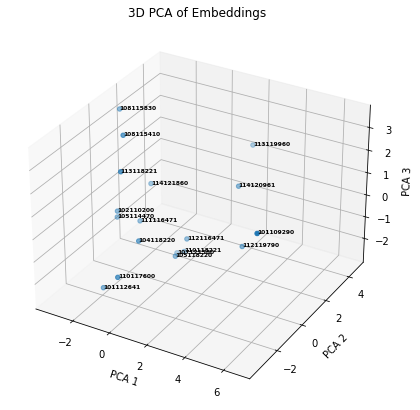

In [5]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Continuing from the previous code...

# Extract embeddings into a matrix for PCA
embedding_values = list(embeddings.values())
embedding_keys = list(embeddings.keys())

# Reduce dimensionality to 3D using PCA
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(embedding_values)

# Plot the embeddings on a 3D graph
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

xs, ys, zs = reduced_embeddings[:, 0], reduced_embeddings[:, 1], reduced_embeddings[:, 2]
ax.scatter(xs, ys, zs)

# Annotate each point with its corresponding key (optional, as it can be cluttered)
for i, key in enumerate(embedding_keys):
    ax.text(xs[i], ys[i], zs[i], key, size=6, color='k', weight='bold')

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.title("3D PCA of Embeddings")
plt.show()